In [2]:
import numpy as np
import h5py 
import os
# plotting
params = {
    'image.origin': 'lower',
    'image.interpolation': 'nearest',
    'image.cmap': 'gray',
    'axes.grid': False,
    'savefig.dpi': 150,
    'axes.labelsize': 30,
    'axes.titlesize': 30,
    'font.size': 30,
    'legend.fontsize': 10,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': True,
    'font.family': 'serif',
}
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(params)
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [3]:
colors = [
    '#377eb8', '#ff7f00', '#4daf4a', 
    '#f781bf', '#a65628', '#984ea3', 
    '#999999', '#e41a1c', '#dede00',
    '#595959', '#5F9ED1', '#C85200',
    '#A2C8EC', '#FFBC79', '#CFCFCF'
]

In [4]:
correlations = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
thresholds = np.array([0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

In [25]:
filenames = ['data/12022018/sparsity1.h5', 'data/12022018/sparsity08.h5']
files = []
for fname in filenames:
     files.append(h5py.File(fname, 'r'))

In [28]:
fn = [file['fn'][:] for file in files]
fp = [file['fp'][:] for file in files]
r2 = [file['r2'][:] for file in files]
r2_true = [file['r2_true'][:] for file in files]

In [34]:
# Average across trials
fn_avg = [np.mean(x, axis=0) for x in fn]
fp_avg = [np.mean(x, axis=0) for x in fp]
r2_avg = [np.mean(x, axis=0) for x in r2]
r2_true_avg = [np.mean(x, axis=0) for x in r2_true]

In [38]:
fn_avg

[array([[48.54, 48.62, 48.9 , 49.4 , 49.74, 49.82],
        [48.28, 48.48, 48.74, 49.34, 49.78, 49.62],
        [48.22, 48.4 , 48.62, 48.9 , 49.08, 48.9 ],
        [48.32, 48.34, 48.52, 48.6 , 48.58, 48.74],
        [47.72, 47.84, 48.06, 47.84, 47.72, 47.96],
        [47.46, 47.56, 47.72, 47.64, 47.5 , 47.32],
        [47.72, 47.46, 47.1 , 46.86, 47.24, 46.44],
        [46.64, 47.08, 46.16, 46.  , 46.3 , 45.74],
        [46.36, 46.3 , 45.7 , 45.28, 45.64, 45.62],
        [45.14, 44.64, 44.6 , 44.76, 44.4 , 44.58],
        [45.56, 45.66, 45.44, 44.94, 44.08, 43.42]]),
 array([[28.28, 28.24, 28.4 , 28.78, 29.08, 29.28],
        [27.82, 28.04, 28.1 , 28.32, 28.72, 28.74],
        [27.82, 27.92, 27.92, 28.32, 28.58, 28.48],
        [27.7 , 27.6 , 27.52, 27.72, 27.72, 27.92],
        [27.24, 27.42, 27.38, 27.36, 27.32, 27.26],
        [27.54, 27.58, 27.5 , 27.42, 27.28, 27.2 ],
        [26.84, 27.  , 27.12, 26.58, 26.54, 26.32],
        [27.08, 26.74, 27.04, 26.54, 26.3 , 25.9 ],
        [2

# False Negatives and False Positives

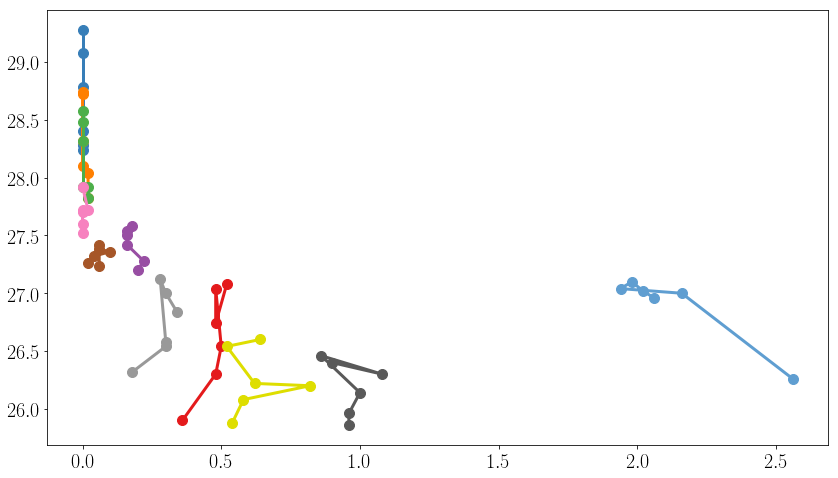

In [40]:
fig, ax = plt.subplots(figsize=(14, 8))
[ax.errorbar(fp_avg[1][idx, :], fn_avg[1][idx, :], linewidth=3, marker='o', color=colors[idx], markersize=10, label=r'$r=%s$' %corr) for idx, corr in enumerate(correlations)]
plt.show()

In [41]:
np.diag(np.ones(5))

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])